# Corneal OCT quantification 
## For "Haze" detection: librairies and plot functions

In [1]:
from src.image_OCT import *
from src.image_Quantification import *
from src.image_Quantification_2 import *
from matplotlib import pyplot as plt
import numpy as np
from scipy import interpolate
import os
from os import listdir
from os.path import isfile, join
import re
import pandas as pd
import math 
import seaborn as sns
from sklearn import datasets, svm

dirname = os.getcwd()
print(dirname)
savefold=os.path.join(dirname, 'Data\Figure\\') # "C:/Users/csoub/OneDrive/Bureau/3A/Ensta/Super projet/Algo_Maelle/Data/Figure/"
extension=".png"
%matplotlib inline
# plt.figure
# plt.savefig(os.path.join(savefold, 'coucou'+extension))

c:\Users\csoub\OneDrive\Bureau\3A\Ensta\Super projet\Quantification_of_corneal_surgery_antecedent


In [2]:
def plot_treatment(im):
	plt.figure()
	plt.subplot(221)
	plt.title("Input image")
	plt.imshow(im.OCT_brut,cmap="gray")
	plt.axis("off")
	plt.subplot(222)
	plt.title("Arrow removal")
	plt.imshow(im.OCT,cmap="gray")
	plt.axis("off")
	plt.subplot(223)
	plt.title("Exposure correction")
	plt.imshow(im.OCT_cut,cmap="gray")
	plt.axis("off")
	plt.subplot(224)
	plt.title("Flattening")
	plt.imshow(im.OCT_flat,cmap="gray")
	plt.axis("off")
	# plt.show()

def plot_profile(im,im_Q):
	plt.figure()
	res=im_Q.res
	peak=res[0];xmin=res[1];xmax=res[2];xlow1=res[3];xlow2=res[4];extractedProf=res[5]	
	plt.subplot(211)
	plt.imshow(im.OCT_flat.transpose(),cmap="gray",aspect="auto")
	plt.axis("off")
	plt.subplot(212)
	plt.plot(im_Q.intentityProfile)
	plt.xlim([0,im_Q.intentityProfile.shape[0]])
	plt.plot(peak,im_Q.intentityProfile[peak],'+')
	# plt.show()

def plot_quantification(im_Q):
	plt.figure()
	peak=im_Q.res[0];xmin=im_Q.res[1];xmax=im_Q.res[2];xlow1=im_Q.res[3];xlow2=im_Q.res[4];extractedProf=im_Q.res[5];cropedProfile=im_Q.res[6]
	plt.plot([xlow1,xlow2],[im_Q.intentityProfile[xlow1],im_Q.intentityProfile[xlow2]],"r+")
	plt.plot(np.arange(xmin,xmax),cropedProfile)
	plt.plot(peak,im_Q.intentityProfile[peak],'+')
	plt.legend(["Peaks","Peak width:"+str(xlow2-xlow1)+" px","Intensity profile"])
	plt.xlabel("depth (px)")
	plt.ylabel("intensity (a.u)")
	# plt.show()

def plot_extracted(im,im_Q):
	plt.figure()
	peak=im_Q.res[0];xmin=im_Q.res[1];xmax=im_Q.res[2];xlow1=im_Q.res[3];xlow2=im_Q.res[4];extractedProf=im_Q.res[5];cropedProfile=im_Q.res[6]
	plt.plot(peak,im_Q.intentityProfile[peak],'+')
	plt.plot([xlow1,xlow2],[im_Q.intentityProfile[xlow1],im_Q.intentityProfile[xlow2]],"r+")
	plt.plot(np.arange(xmin,xmax),cropedProfile)
	plt.legend(["Peaks","Peak width:"+str(xlow2-xlow1)+" px","Intensity profile"])
	plt.xlabel("depth (px)")
	plt.ylabel("intensity (a.u)")

def im_plot(im,type='OCT_brut'):
	plt.figure()
	if type=='OCT_brut':
		plt.imshow(im.OCT_brut,cmap="gray",aspect="auto")
	elif type=='OCT':
		plt.imshow(im.OCT_brut,cmap="gray",aspect="auto")
	elif type=='OCT_cut':
		plt.imshow(im.OCT_cut,cmap="gray",aspect="auto")
	elif type=='OCT_flat':
		plt.imshow(im.OCT_flat,cmap="gray",aspect="auto")
	else:
		print("Type not recognize")


## Example of profile extraction and fitting

Cross


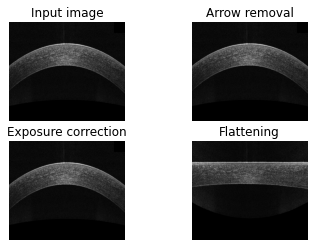

In [3]:
# filepathname=os.path.join(dirname, 'Data','HAZE','haze 3.jpg')
# filepathname=os.path.join(dirname, 'Data','Healthy','23923_BOULIS_OD.jpg')
filepathname=os.path.join(dirname, 'Data','VILBERT_Maelle','test.jpg')
# filepathname=os.path.join(dirname, 'Data','Healthy_2','NASRAM_OD_Cross.jpg')
# filepathname=os.path.join(dirname, 'Data','Fuchs_2','VANLUD_OD_6_Line.jpg')
# filepathname=os.path.join(dirname, 'Data','Healthy','80608_REZAZK_OS.jpg')

im=image_OCT(filepathname)
print(im.Path_eye)
im.AutoTreatment()
plot_treatment(im)
moving=False

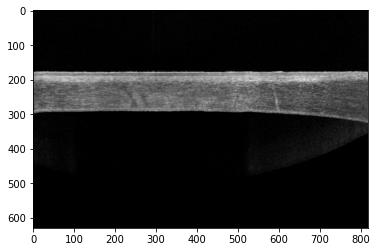

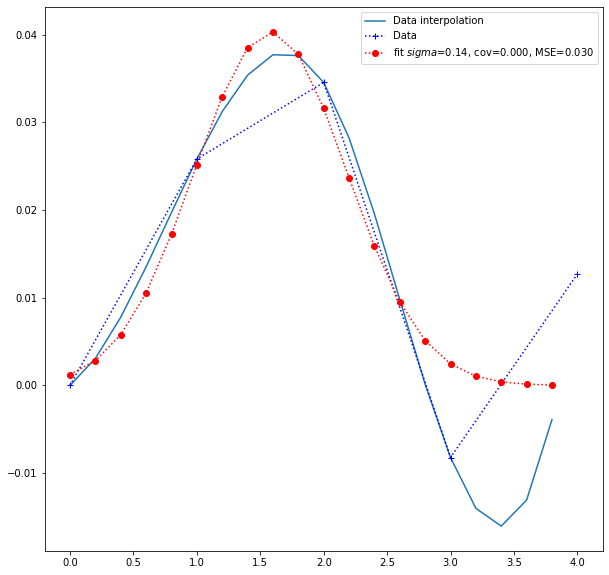

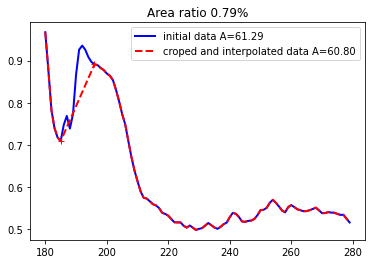

{'PeakWidth': 0.9231479344564966, 'Sigma': 0.13832006124211593, 'DataCov': 0.00025698149596501356, 'Mean': 0.3650148280707785, 'MSE': 0.030188695678533727, 'AreaRatio': 0.007920807193552266}


<Figure size 432x288 with 0 Axes>

<Figure size 720x720 with 0 Axes>

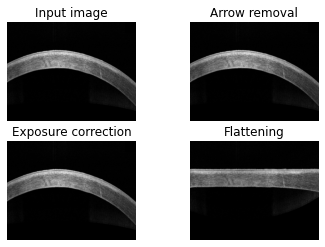

<Figure size 432x288 with 0 Axes>

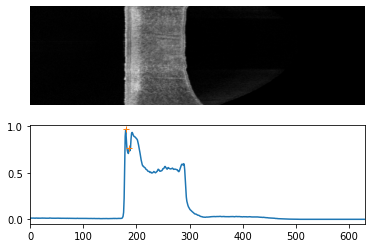

<Figure size 432x288 with 0 Axes>

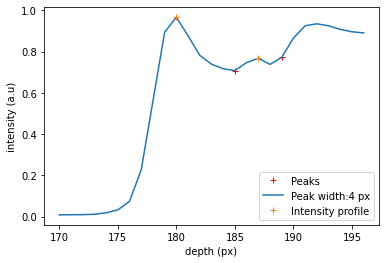

In [4]:
# filepathname=os.path.join(dirname, 'Data','HAZE','haze 1.jpg')
# filepathname=os.path.join(dirname, 'Data','Healthy','23923_BOULIS_OD.jpg')
# filepathname=os.path.join(dirname, 'Data','VILBERT_Maelle','test.jpg')
filepathname=os.path.join(dirname, 'Data','Fuchs_2','VANLUD_OD_6_Line.jpg')

im=image_OCT(filepathname)
im.AutoTreatment()
im_plot(im,type='OCT_flat')
moving=False
intensity_corr=True

plt.figure(figsize=(10,10))
im_Q=image_Quantification(im,plot=True,moving=moving,intensity_corr=intensity_corr)
# im_Q=image_Quantification_2(im,plot=True,intensity_corr=intensity_corr)
# print("Under bowman:",im_Q.underBowman)
if not moving:
	plt.savefig(savefold+"profile"+extension)

	plt.figure(figsize=(10,10))
	plot_treatment(im)
	plt.savefig(savefold+"profile1"+extension)

	plt.figure()
	plot_profile(im,im_Q)
	plt.savefig(savefold+"profile2"+extension)

	plt.figure()
	plot_quantification(im_Q)
	plt.savefig(savefold+"profile3"+extension)
else:
    print(im_Q.parameters)
# plt.imshow(im.OCT_flat)
# filepathname="C:/Users/csoub/OneDrive/Bureau/3A/Ensta/Super projet/Algo_Maelle/Data/HAZE/haze 1.jpg"
# im=image_OCT(filepathname)
# im.AutoTreatment()
# im_Q=image_Quantification(im,plot=True)
# plot_profile(im,im_Q.res)
# plt.imshow(im.OCT_flat)
print(im_Q.parameters)

## Multi-image treatment
### Dataset extraction

In [5]:
moving=False

In [6]:
repertory_haze=os.path.join(dirname, 'Data','HAZE')
repertory_healthy=os.path.join(dirname, 'Data','Healthy')

files_haze = [f for f in listdir(repertory_haze) if isfile(join(repertory_haze, f))]
files_healthy = [f for f in listdir(repertory_healthy) if isfile(join(repertory_healthy, f))]

quantification=[]
i=0
i_list_haze=[]
for haze in files_haze:
	i+=1
	im=image_OCT(os.path.join(repertory_haze, haze))
	try:
		im.AutoTreatment()
		# im_Q=image_Quantification_2(im,plot=False,intensity_corr=intensity_corr)
		im_Q=image_Quantification(im,plot=False,moving=moving,intensity_corr=intensity_corr)
		parameters=im_Q.parameters
		parameters["Healthy"]=0
		parameters["Origin"]=haze[:-4]
		quantification.append(parameters)
		print(i,":",haze)
		i_list_haze.append(i)
	except:
		print("Error with: "+haze+" image #"+str(i))

i=0
i_list_healthy=[]
for healthy in files_healthy:
	i+=1
	im=image_OCT(os.path.join(repertory_healthy, healthy))
	try:
		im.AutoTreatment()
		# im_Q=image_Quantification_2(im,plot=False,intensity_corr=intensity_corr)
		im_Q=image_Quantification(im,plot=False,moving=moving,intensity_corr=intensity_corr)
		parameters=im_Q.parameters
		parameters["Healthy"]=1
		parameters["Origin"]=healthy[:-4]
		quantification.append(parameters)
		print(i,":",healthy)
		i_list_healthy.append(i)
	except:
		print("Error with: "+healthy+" image #"+str(i))

n=len(quantification)
data=pd.DataFrame(quantification,index=range(n)) 
data.to_pickle("./Dataset/data_set_learning_small.pkl")

1 : haze 1.jpg
2 : haze 2.jpg
3 : haze 3.jpg
4 : haze 4.jpg
5 : haze 5.jpg
Error with: haze 6.jpg image #6
1 : 23923_BOULIS_OD.jpg
2 : 79296_BESNIC_OD.jpg
3 : 80552_CORANT_OD.jpg
4 : 80552_CORANT_OS.jpg
5 : 80553_DUMFAU_OD.jpg
6 : 80553_DUMFAU_OS.jpg
7 : 80608_REZAZK_OD.jpg
Error with: 80608_REZAZK_OS.jpg image #8
9 : 81225_GOLDIM_OD.jpg
10 : 81225_GOLDIM_OS.jpg
11 : 81232_VILMAE_OD.jpg
12 : 81232_VILMAE_OS.jpg


### Result of quantification and variables correlation

In [7]:
data


,PeakWidth,Sigma,DataCov,Mean,MSE,AreaRatio,Healthy,Origin
0,1.846296,0.380289,0.005340,0.978498,0.060113,0.025375,0,haze 1
1,1.850995,0.394971,0.006379,0.871426,0.066393,0.027338,0,haze 2
2,2.769444,0.473048,0.008245,1.395871,0.101507,0.032512,0,haze 3
3,1.846296,0.392768,0.003314,0.964355,0.057010,0.016730,0,haze 4
4,2.313744,0.436671,0.003021,1.285458,0.044205,0.025865,0,haze 5
5,1.384722,0.246538,0.002342,0.639839,0.018596,0.014643,1,23923_BOULIS_OD
6,1.384722,0.188283,0.003954,0.549495,0.051042,0.022550,1,79296_BESNIC_OD
7,1.384722,0.207991,0.004476,0.755853,0.073775,0.022506,1,80552_CORANT_OD
8,1.384722,0.224115,0.004386,0.668451,0.029632,0.019277,1,80552_CORANT_OS
9,1.384722,0.227556,0.003016,0.595273,0.034183,0.020157,1,80553_DUMFAU_OD


<AxesSubplot:>

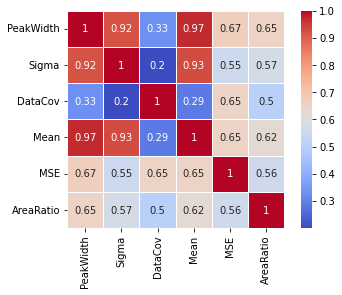

In [8]:
data_copy=data.drop(["Healthy","Origin"],axis=1)
data_copy=(data_copy-np.mean(data_copy,0))/np.std(data_copy,0)
cor=data_copy.corr()
sns.heatmap(cor, square = True, cmap="coolwarm",linewidths=.5,annot=True )

### Plot two by two

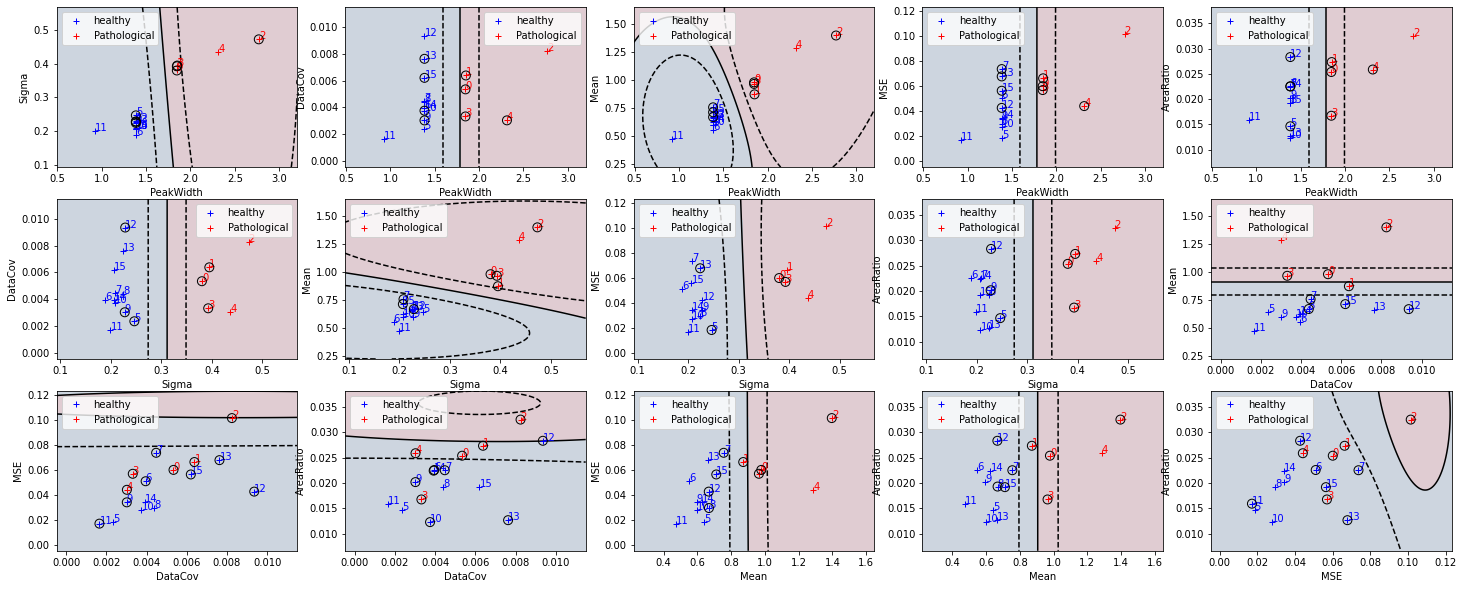

In [9]:
#Plot two by two
import warnings
warnings.filterwarnings("ignore")

variable=data_copy.columns
k=len(variable)
comb=math.comb(k,2)
	
plt.figure(figsize=(25,10))
nline=3
ncol=comb//nline+int(comb/nline-comb//nline+0.5)
l=0
for i in range(k-1):
    for j in range(i+1,k):
        l+=1
        plt.subplot(nline,ncol,l)
        x_class1=data[variable[i]][data["Healthy"]==1]
        y_class1=data[variable[j]][data["Healthy"]==1]
        x_class0=data[variable[i]][data["Healthy"]==0]
        y_class0=data[variable[j]][data["Healthy"]==0]
        plt.plot(x_class1.T,y_class1.T,"b+",label="healthy")
        plt.plot(x_class0.T,y_class0.T,"r+",label="Pathological")
        for m in range(len(data)):
            if data["Healthy"][m]==1:
                plt.text(data[variable[i]][m],data[variable[j]][m],str(m),color="blue")
            else:
                plt.text(data[variable[i]][m],data[variable[j]][m],str(m),color="red")
        X=data[variable[i]]
        Y=data[variable[j]]
        Z=np.array([X.to_numpy().T,Y.to_numpy().T]).T
        C=np.array([data["Healthy"].to_numpy()]).T
        clf = svm.SVC()
        clf.fit(Z, C)
        x_min = Z[:, 0].min()-1*np.std(Z[:, 0])
        x_max = Z[:, 0].max()+1*np.std(Z[:, 0])
        y_min = Z[:, 1].min()-1*np.std(Z[:, 1])
        y_max = Z[:, 1].max()+1*np.std(Z[:, 1])
        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
        Z = Z.reshape(XX.shape)
        plt.scatter(clf.support_vectors_[:, 0],clf.support_vectors_[:, 1],s=80,facecolors="none",zorder=10,edgecolors="k")
        plt.pcolormesh(XX, YY, Z > 0, cmap="RdBu",alpha=0.2) #plt.cm.Paired
        plt.contour(XX,YY,Z,colors=["k", "k", "k"],linestyles=["--", "-", "--"],levels=[-0.5, 0, 0.5],linewidth=0.1)
        plt.xlabel(variable[i])
        plt.ylabel(variable[j])
        plt.legend()
        

### Exemple of treatment

c:\Users\csoub\OneDrive\Bureau\3A\Ensta\Super projet\Quantification_of_corneal_surgery_antecedent\Data\HAZE\haze 5.jpg


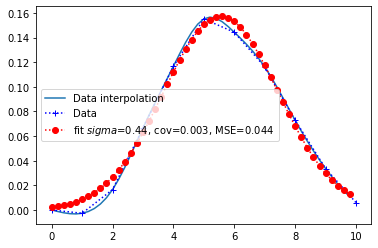

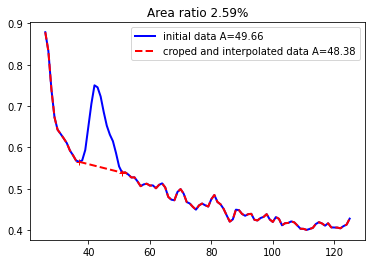

c:\Users\csoub\OneDrive\Bureau\3A\Ensta\Super projet\Quantification_of_corneal_surgery_antecedent\Data\Healthy\80553_DUMFAU_OD.jpg


<Figure size 432x288 with 0 Axes>

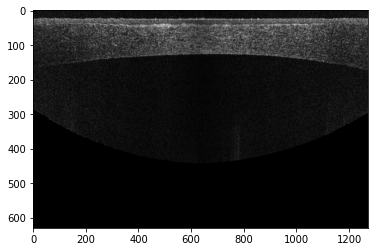

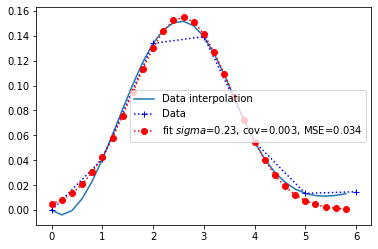

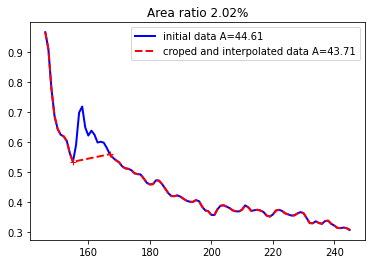

<Figure size 432x288 with 0 Axes>

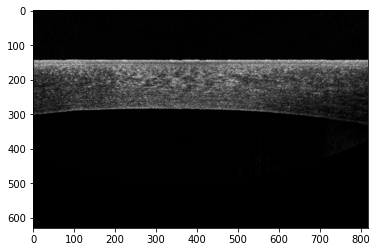

In [10]:
i=4
im=image_OCT(os.path.join(repertory_haze, files_haze[i]))
print(im.Path)
im.AutoTreatment()
im_Q=image_Quantification(im,True,intensity_corr=intensity_corr)
plt.figure();im_plot(im,type='OCT_flat')
# plot_profile(im,im_Q)
# im_plot(im,type='OCT_flat')

plt.figure()
i=4
im=image_OCT(os.path.join(repertory_healthy, files_healthy[i]))
print(im.Path)
im.AutoTreatment()
im_Q=image_Quantification(im,True,intensity_corr=intensity_corr)
plt.figure();im_plot(im,type='OCT_flat')
# plot_profile(im,im_Q)
# im_plot(im,type='OCT_flat')

## SVM classifier
### On PCA axis

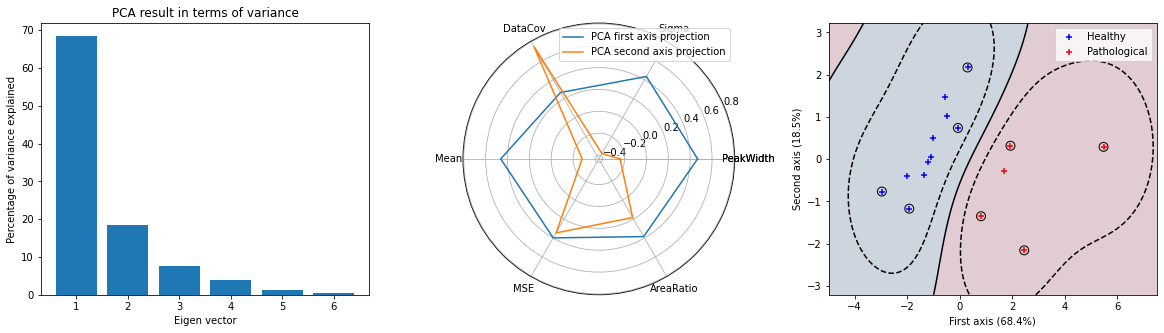

In [11]:
# PCA
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
from sklearn import svm

data_copy=data.drop(["Healthy","Origin"],axis=1)
data_copy=(data_copy-np.mean(data_copy,0))/np.std(data_copy,0)
N=len(data_copy)
K=len(data_copy.columns)
pca = PCA()
pca.fit(data_copy)


plt.figure(figsize=(20,5))
plt.subplot(131)
plt.bar(np.arange(1,K+1,1),pca.explained_variance_ratio_*100)
plt.xlabel('Eigen vector')
plt.ylabel('Percentage of variance explained')
plt.title("PCA result in terms of variance")
plt.subplot(132,polar=True)
categories = data_copy.columns
categories = [*categories, categories[0]]
axis1= pca.components_[0]
axis1 = [*axis1, axis1[0]]
axis2= pca.components_[1]
axis2 = [*axis2, axis2[0]]
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(axis1))
plt.plot(label_loc, axis1, label='PCA first axis projection')
plt.plot(label_loc, axis2, label='PCA second axis projection')
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()

X=np.sum(data_copy*pca.components_[0],axis=1)
Y=np.sum(data_copy*pca.components_[1],axis=1)
Z=np.array([X.to_numpy().T,Y.to_numpy().T]).T
C=np.array([data["Healthy"].to_numpy()]).T
clf = svm.SVC()
clf.fit(Z, C)
x_min = Z[:, 0].min()-1*np.std(Z[:, 0])
x_max = Z[:, 0].max()+1*np.std(Z[:, 0])
y_min = Z[:, 1].min()-1*np.std(Z[:, 1])
y_max = Z[:, 1].max()+1*np.std(Z[:, 1])

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)

plt.subplot(133)
plt.scatter(X[data["Healthy"]==1],Y[data["Healthy"]==1],c="b",marker="+",label="Healthy",zorder=10)
plt.scatter(X[data["Healthy"]==0],Y[data["Healthy"]==0],c="r",marker="+",label="Pathological",zorder=10)

plt.scatter(clf.support_vectors_[:, 0],clf.support_vectors_[:, 1],s=80,facecolors="none",zorder=10,edgecolors="k")
plt.pcolormesh(XX, YY, Z > 0, cmap="RdBu",alpha=0.2) #plt.cm.Paired
plt.contour(XX,YY,Z,colors=["k", "k", "k"],linestyles=["--", "-", "--"],levels=[-0.5, 0, 0.5],linewidth=1)
plt.xlabel("First axis ({:.1f}%)".format(pca.explained_variance_ratio_[0]*100))
plt.ylabel("Second axis ({:.1f}%)".format(pca.explained_variance_ratio_[1]*100))
plt.legend()

pca = PCA(n_components=2)
data_proj=pca.fit(data_copy,data["Healthy"])

### Leave one out test

In [12]:
#SVM LOO test

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import confusion_matrix
X=np.sum(data_copy*pca.components_[0],axis=1)
Y=np.sum(data_copy*pca.components_[1],axis=1)
Z=np.array([X.to_numpy().T,Y.to_numpy().T]).T
C=np.array([data["Healthy"].to_numpy()]).T

loo = LeaveOneOut()
loo.get_n_splits(Z)
result=[]
result_pred=[]
conf=np.zeros((2,2))
for train_index, test_index in loo.split(X):
	print("TRAIN:", train_index, "TEST:", test_index)
	X_train, X_test = Z[train_index], Z[test_index]
	y_train, y_test = C[train_index], C[test_index]
	clf = svm.SVC()
	clf.fit(X_train, y_train)
	y_predict=clf.predict(X_test)
	result.append(y_test.ravel()[0])
	result_pred.append(y_predict.ravel()[0])
	if y_predict[0]==y_test[0][0] and y_test[0][0]==0:
		conf[0,0]+=1
	elif y_predict[0]!=y_test[0][0] and y_test[0][0]==1:
		print(y_predict,y_test)
		conf[0,1]+=1
	elif y_predict[0]!=y_test[0][0] and y_test[0][0]==0:
		conf[1,0]+=1
	elif y_predict[0]==y_test[0][0] and y_test[0][0]==1:
		conf[1,1]+=1
# print(result_pred)
# print(result)
# print(result_pred==result)
# ytrain=data["Healthy"].to_numpy()
print(conf)

TRAIN: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] TEST: [0]
TRAIN: [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15] TEST: [1]
TRAIN: [ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15] TEST: [2]
TRAIN: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15] TEST: [3]
TRAIN: [ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15] TEST: [4]
TRAIN: [ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15] TEST: [5]
TRAIN: [ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15] TEST: [6]
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15] TEST: [7]
TRAIN: [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15] TEST: [8]
TRAIN: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15] TEST: [9]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15] TEST: [10]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15] TEST: [11]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15] TEST: [12]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15] TEST: [13]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15] TEST: [14]
TRAIN: [ 0  1  2  3  4  5  6  7  8 

## Random Forest

In [13]:
#RF LOO test
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 2020)
data_copy=(data_copy-np.mean(data_copy,0))/np.std(data_copy,0)
rf.fit(data_copy, data["Healthy"])
predictions = rf.predict(data_copy)
# confusion_matrix(predictions, data["Healthy"])
predictions=(predictions+0.5).astype(int)
ytrain=data["Healthy"].to_numpy()

print(confusion_matrix(predictions,ytrain))
print(predictions)
print(ytrain)


[[ 5  0]
 [ 0 11]]
[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]


Text(0.5, 0, 'Relative Importance')

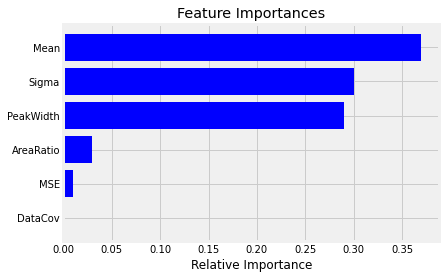

In [14]:
importances = rf.feature_importances_
indices = np.argsort(importances)
# style du graphique 
plt.style.use('fivethirtyeight')
%matplotlib inline
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [data_copy.columns[i] for i in indices])
plt.xlabel('Relative Importance')

## New healthy dataset

In [15]:
repertory_healthy_2=os.path.join(dirname, 'Data','Healthy_2')
healthy_value=1 #healthy

def create_new_dataset(repository,healthy_value):
	files = [f for f in listdir(repository) if isfile(join(repository, f))]
	quantification=[]
	i=0
	i_list=[]
	for f in files:
		if(f[-3:]=="jpg"):
			i+=1
			try:
				im=image_OCT(os.path.join(repository, f))
			except:
				print("Error with: "+f+" image #"+str(i))
			try:
				im.AutoTreatment()
				im_Q=image_Quantification(im,plot=False,moving=moving,intensity_corr=intensity_corr)
				# im_Q=image_Quantification_2(im,plot=False,intensity_corr=intensity_corr)
				parameters=im_Q.parameters
				parameters["Healthy"]=healthy_value
				parameters["Origin"]=f[:-4]
				quantification.append(parameters)
				# print(i,":",healthy)
				i_list.append(i)
			except:
				print("Error with: "+f+" image #"+str(i))
	n=len(quantification)
	print(n,"/",len(files)," files succesfully quantified")
	data=pd.DataFrame(quantification,index=range(n)) 
	return(data)

data_2=create_new_dataset(repertory_healthy_2,healthy_value)
data_2.to_pickle("./Dataset/data_set_healthy.pkl")

Error with: ARAILI_OS_Pachy.jpg image #2
Error with: CORDIA_OD_PachyWide.jpg image #24
Error with: DENCAM_OS_PachyWide.jpg image #30
Error with: DRONIC_OD_Cross.jpg image #35
Error with: DUFLAU_OD_PachyWide.jpg image #40
Error with: ESTNAN_OD_Line.jpg image #47
Error with: FAVJUL_OD_Line.jpg image #51
Error with: FAVJUL_OS_Pachy.jpg image #54
Error with: GAYSTE_OD_Line.jpg image #55
Error with: GAYSTE_OS_PachyWide.jpg image #58
Error with: GIRCHA_OD_Cross.jpg image #59
Error with: GRESUZ_OS_Line.jpg image #67
Error with: GRESUZ_OS_Pachy.jpg image #68
Error with: LELCLA_OS_Pachy.jpg image #94
Error with: MAGKOR_OD_PachyWide.jpg image #108
Error with: MARPHI_OS_PachyWide.jpg image #114
Error with: NASRAM_OD_PachyWide.jpg image #132
Error with: NASRAM_OS_Cross.jpg image #133
Error with: SLOJUL_OD_PachyWide.jpg image #152
Error with: SLOJUL_OS_PachyWide.jpg image #154
Error with: WIETIP_OD_Pachy.jpg image #164
145 / 166  files succesfully quantified


In [16]:
data_2

,PeakWidth,Sigma,DataCov,Mean,MSE,AreaRatio,Healthy,Origin
0,0.923148,0.192022,0.010441,0.494268,0.042019,0.023615,1,ARAILI_OS_Line
1,1.384722,0.207173,0.007088,0.616592,0.071651,0.020323,1,BEGABD_OD_Cross
2,1.384722,0.178616,0.008137,0.662692,0.080370,0.019066,1,BEGABD_OD_Pachy
3,1.384722,0.190988,0.007933,0.628456,0.088622,0.020435,1,BEGABD_OS_Cross
4,1.384722,0.173152,0.007359,0.573725,0.148950,0.017489,1,BEGABD_OS_Pachy
...,...,...,...,...,...,...,...,...
140,1.384722,0.222632,0.004758,0.563157,0.064476,0.022139,1,TOUMAT_OS_Cross
141,0.923148,0.202665,0.003875,0.547548,0.035856,0.018839,1,TOUMAT_OS_Pachy
142,0.923148,0.209607,0.002006,0.534759,0.019756,0.012935,1,WIETIP_OD_Line
143,0.923148,0.194756,0.002725,0.414720,0.029858,0.007072,1,WIETIP_OS_Line


(145, 6) 6
Ratio of true positive: 98.62%
Miss classified:2
Missclassify: LOPDEB_OS_Pachy
Missclassify: NASRAM_OD_Cross


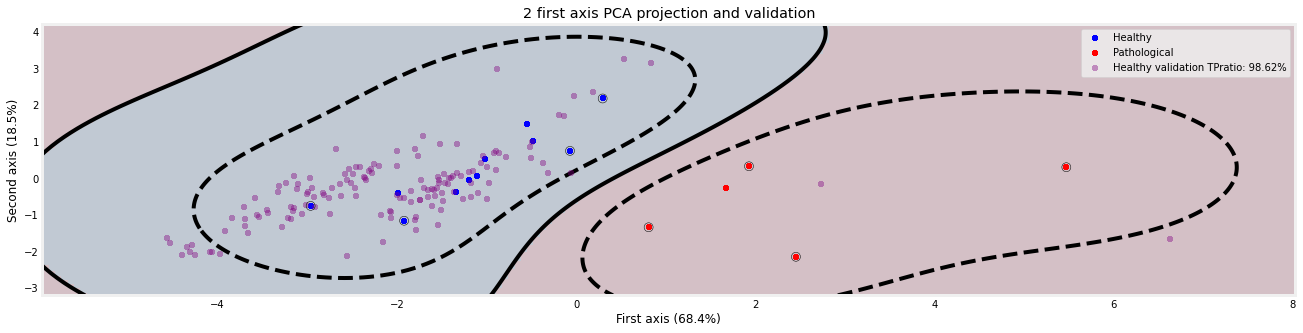

In [17]:
data_copy_2=data_2.drop(["Healthy","Origin"],axis=1)
print(data_copy_2.shape,len(pca.components_[0]))
data_copy_2=(data_copy_2-np.mean(data.drop(["Healthy","Origin"],axis=1),0))/np.std(data.drop(["Healthy","Origin"],axis=1),0)

X_2=np.sum(data_copy_2*pca.components_[0],axis=1)
Y_2=np.sum(data_copy_2*pca.components_[1],axis=1)
Z_2=np.array([X_2.to_numpy().T,Y_2.to_numpy().T]).T

class_z=np.ones((len(Z_2),1))
y_predict_2=clf.predict(Z_2)
print("Ratio of true positive: {:.2f}%".format(100*np.sum(y_predict_2)/len(y_predict_2)))
print("Miss classified:"+str(len(y_predict_2)-np.sum(y_predict_2)))
for i,y in enumerate(y_predict_2):
    if y==0:
        print("Missclassify:",data_2["Origin"][i])
        

X=np.sum(data_copy*pca.components_[0],axis=1)
Y=np.sum(data_copy*pca.components_[1],axis=1)
Z=np.array([X.to_numpy().T,Y.to_numpy().T]).T
C=np.array([data["Healthy"].to_numpy()]).T

x_min = np.min([ Z[:, 0].min()-1*np.std(Z[:, 0]), Z_2[:, 0].min()-1*np.std(Z_2[:, 0])])
x_max = np.max([ Z[:, 0].max()+1*np.std(Z[:, 0]), Z_2[:, 0].max()+1*np.std(Z_2[:, 0])])
y_min = np.min([ Z[:, 1].min()-1*np.std(Z[:, 1]), Z_2[:, 1].min()-1*np.std(Z_2[:, 1])])
y_max = np.max([ Z[:, 1].max()+1*np.std(Z[:, 1]), Z_2[:, 1].max()+1*np.std(Z_2[:, 1])])

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)

plt.figure(figsize=(20,5))
plt.scatter(X[data["Healthy"]==1],Y[data["Healthy"]==1],c="b",marker="+",label="Healthy",zorder=10)
plt.scatter(X[data["Healthy"]==0],Y[data["Healthy"]==0],c="r",marker="+",label="Pathological",zorder=10)
plt.scatter(X_2,Y_2,c="purple",marker="+",label="Healthy validation TPratio: {:.2f}%".format(100*np.sum(y_predict_2)/len(y_predict_2)),zorder=10,alpha=0.4)

plt.scatter(clf.support_vectors_[:, 0],clf.support_vectors_[:, 1],s=80,facecolors="none",zorder=10,edgecolors="k")
plt.pcolormesh(XX, YY, Z > 0, cmap="RdBu",alpha=0.2) #plt.cm.Paired
plt.contour(XX,YY,Z,colors=["k", "k", "k"],linestyles=["--", "-", "--"],levels=[-0.5, 0, 0.5],linewidth=1)

plt.title("2 first axis PCA projection and validation")
plt.xlabel("First axis ({:.1f}%)".format(pca.explained_variance_ratio_[0]*100))
plt.ylabel("Second axis ({:.1f}%)".format(pca.explained_variance_ratio_[1]*100))
plt.legend()

In [18]:
ind=np.where(X_2>8)[0]
data_2.T[ind]

""
PeakWidth
Sigma
DataCov
Mean
MSE
AreaRatio
Healthy
Origin


In [19]:
np.mean(data_2,0)

PeakWidth    1.162525
Sigma        0.197966
DataCov      0.002739
Mean         0.569546
MSE          0.041726
AreaRatio    0.014322
Healthy      1.000000
dtype: float64

In [20]:
np.std(data_2,0)

PeakWidth    0.271714
Sigma        0.047958
DataCov      0.001798
Mean         0.104595
MSE          0.027928
AreaRatio    0.006030
Healthy      0.000000
dtype: float64

# Fuchs

In [21]:
repertory_fuchs=os.path.join(dirname, 'Data','Fuchs_2')
# repertory_fuchs=os.path.join(dirname, 'Data','Fuchs_renammed')
healthy_value=2 #fushs

data_fuchs=create_new_dataset(repertory_fuchs,healthy_value)


Error with: BOUHEN_OD_0_Line.jpg image #27
Error with: BOUMOH_OD_0_Line.jpg image #32
Error with: BOUMOH_OD_12_Line.jpg image #34
Error with: BOUMOH_OD_9_Pachy.jpg image #36
Error with: BRIMIC_OD_9_PachyWide.jpg image #53
Error with: CHADUC_OD_3_CorneaLine.jpg image #56
Error with: CLAMAR_OD_0_Line.jpg image #58
Error with: CLAMAR_OD_0_PachyWide.jpg image #59
Error with: DEVGUY_OS_0_Line.jpg image #75
Error with: GALHEL_OS_0_Line.jpg image #98
Error with: GALHEL_OS_1_Line.jpg image #101
Error with: GALHEL_OS_1_PachyWide.jpg image #102
Error with: GALHEL_OS_6_Pachy.jpg image #104
Error with: GOMPAS_OD_0_Pachy.jpg image #125
Error with: GUIMIC_OD_12_Line.jpg image #132
Error with: GULARL_OD_18_Pachy.jpg image #143
Error with: GULARL_OD_6_Pachy.jpg image #145
Error with: HADBER_OS_0_Line.jpg image #146
Error with: HADBER_OS_0_Line.jpg image #146
Error with: HANDAN_OS_1_Line.jpg image #157
Error with: HANDAN_OS_1_Pachy.jpg image #158
Error with: HUEBER_OD_3_PachyWide.jpg image #167
Error w

In [22]:
# data_fuchs_detail=pd.read_pickle(os.path.join(repertory_fuchs,"data_renamed.pkl"))
len(data_fuchs)

month=np.ones(len(data_fuchs))*np.nan
for i in range(len(data_fuchs)):
    origin=data_fuchs["Origin"][i]
    origin_split=origin.split("_")
    month[i]=int(origin_split[2])
data_fuchs=data_fuchs.assign(Month=month)
data_fuchs.to_pickle("./Dataset/data_set_fuchs.pkl")

In [23]:
# data_fuchs_detailed=data_fuchs.copy()
# data_fuchs_detailed.insert(len(data_fuchs_detailed.T),"month",0)
# data_fuchs_detailed.insert(len(data_fuchs_detailed.T),"type","")
# for i in range(len(data_fuchs_detailed)):
#     index=np.where(data_fuchs_detail==data_fuchs["Origin"][i])[0]
#     data_fuchs_detailed["month"][i]=data_fuchs_detail["Month"][index]
#     data_fuchs_detailed["type"][i]=data_fuchs_detail["type"][index]

In [24]:
data_fuchs.head()

,PeakWidth,Sigma,DataCov,Mean,MSE,AreaRatio,Healthy,Origin,Month
0,1.384722,0.258755,0.000937,0.773321,0.050214,0.019196,2,BARVER_OD_0_Line,0.0
1,1.846296,0.458977,0.002127,1.048359,0.119122,0.020066,2,BARVER_OD_0_Pachy,0.0
2,2.769444,0.643893,0.004419,1.274145,0.126492,0.035299,2,BARVER_OD_12_Line,12.0
3,2.307870,0.585373,0.002322,1.082946,0.090706,0.028364,2,BARVER_OD_12_Pachy,12.0
4,2.307870,0.522593,0.003295,1.056608,0.065018,0.022139,2,BARVER_OD_1_Line,1.0


In [25]:
list_parameters=["PeakWidth","Sigma","DataCov","Mean","MSE","AreaRatio","Healthy","Origin"]
total_data=[data_2[list_parameters],data_fuchs[list_parameters+["Month"]]]
total_data=pd.concat(total_data)
print(len(total_data))

427


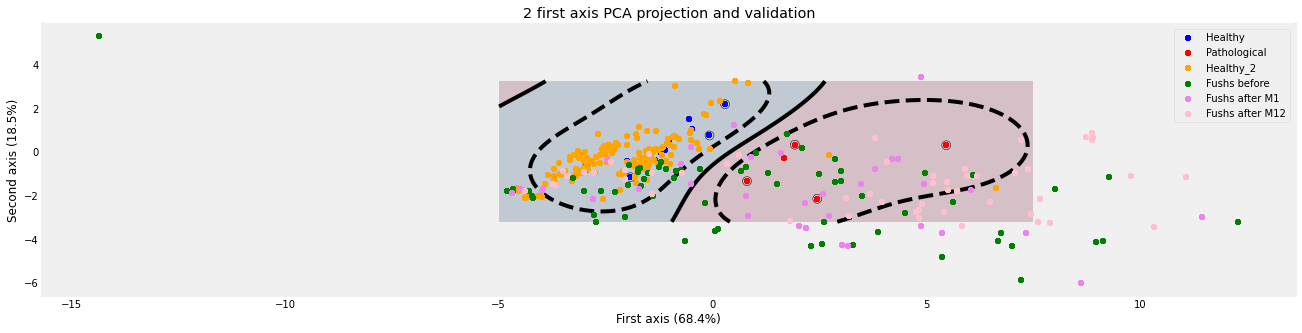

In [26]:
	# repertory_healthy=os.path.join(dirname, 'Data','Healthy')
	# healthy_value=1 #healthy
	# data_healthy=create_new_dataset(repertory_healthy,healthy_value,movingWin=move,eliminate=eliminate)

	# repertory_healthy_2=os.path.join(dirname, 'Data','Healthy_2')
	# healthy_value=1 #healthy
	# data_healthy_2=create_new_dataset(repertory_healthy_2,healthy_value,movingWin=move,eliminate=eliminate)

	# repertory_haze=os.path.join(dirname, 'Data','HAZE')
	# healthy_value=0 #patho
	# data_haze=create_new_dataset(repertory_haze,healthy_value,movingWin=move,eliminate=eliminate)
 
plt.figure(figsize=(20,5))
#Learning data
data_copy=data.drop(["Healthy","Origin"],axis=1)
data_set_mean=np.mean(data_copy,0)
data_set_std=np.std(data_copy,0)
data_copy=(data_copy-np.mean(data_copy,0))/np.std(data_copy,0)

## Data extraction and projection
X=np.sum(data_copy*pca.components_[0],axis=1)
Y=np.sum(data_copy*pca.components_[1],axis=1)
Z=np.array([X.to_numpy().T,Y.to_numpy().T]).T
C=np.array([data["Healthy"].to_numpy()]).T
## Prediction
class_z=np.ones((len(Z),1))
y_predict=clf.predict(Z)

# Other data

total_data_copy=total_data[list_parameters[:-2]]
total_data_copy=(total_data_copy-np.mean(data.drop(["Healthy","Origin"],axis=1),0))/np.std(data.drop(["Healthy","Origin"],axis=1),0)

## Data extraction and projection
X_other=np.sum(total_data_copy*pca.components_[0],axis=1)
Y_other=np.sum(total_data_copy*pca.components_[1],axis=1)
Z_other=np.array([X.to_numpy().T,Y.to_numpy().T]).T
C_other=np.array([data["Healthy"].to_numpy()]).T
## Prediction
class_z_other=np.ones((len(Z_other),1))
y_predict_other=clf.predict(Z_other)


## SVM Plot
x_min = Z[:, 0].min()-1*np.std(Z[:, 0])
x_max = Z[:, 0].max()+1*np.std(Z[:, 0])
y_min = Z[:, 1].min()-1*np.std(Z[:, 1])
y_max = Z[:, 1].max()+1*np.std(Z[:, 1])
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
ZZ = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
ZZ = ZZ.reshape(XX.shape)

plt.scatter(clf.support_vectors_[:, 0],clf.support_vectors_[:, 1],s=80,facecolors="none",zorder=10,edgecolors="k")
plt.pcolormesh(XX, YY, ZZ > 0, cmap="RdBu",alpha=0.2) #plt.cm.Paired
plt.contour(XX,YY,ZZ,colors=["k", "k", "k"],linestyles=["--", "-", "--"],levels=[-0.5, 0, 0.5],linewidth=1)


## Data plot
### Learning dataset
plt.scatter(X[data["Healthy"]==1],Y[data["Healthy"]==1],c="b",marker="+",label="Healthy",zorder=10)
plt.scatter(X[data["Healthy"]==0],Y[data["Healthy"]==0],c="r",marker="+",label="Pathological",zorder=10)
# plt.scatter(X,Y,c="orange",marker="+",label="Healthy validation TPratio: {:.2f}%".format(100*np.sum(y_predict_2)/len(y_predict_2)),zorder=10)
bool_pre_op=(total_data["Month"]==0)*(total_data["Healthy"]==2)
bool_post_op_M1=(total_data["Month"]==1)*(total_data["Healthy"]==2)
bool_post_op_M3=(total_data["Month"]==3)*(total_data["Healthy"]==2)
bool_post_op_M6=(total_data["Month"]==6)*(total_data["Healthy"]==2)
bool_post_op_M12=(total_data["Month"]==12)*(total_data["Healthy"]==2)
plt.scatter(X_other[total_data["Healthy"]==1],Y_other[total_data["Healthy"]==1],c="orange",marker="+",label="Healthy_2",zorder=10)
plt.scatter(X_other[bool_pre_op],Y_other[bool_pre_op],c="green",marker="+",label="Fushs before",zorder=10)
plt.scatter(X_other[bool_post_op_M1],Y_other[bool_post_op_M1],c="violet",marker="+",label="Fushs after M1",zorder=10)
plt.scatter(X_other[bool_post_op_M12],Y_other[bool_post_op_M12],c="pink",marker="+",label="Fushs after M12",zorder=10)

plt.title("2 first axis PCA projection and validation")
plt.xlabel("First axis ({:.1f}%)".format(pca.explained_variance_ratio_[0]*100))
plt.ylabel("Second axis ({:.1f}%)".format(pca.explained_variance_ratio_[1]*100))
plt.legend()

Error with: 80608_REZAZK_OS.jpg image #8
11 / 12  files succesfully quantified
Error with: haze 6.jpg image #6
5 / 6  files succesfully quantified
Error with: COUMAR_FuchsDMEK_OD_Line_2.jpg image #3
Error with: COUMAR_FuchsDMEK_OD_Line_4.jpg image #5
Error with: GAUGER_FuchsDMEK_OS_Line_1.jpg image #13
Error with: JACDOM_FuchsDMEK_OD_Line_3.jpg image #21
22 / 26  files succesfully quantified


Text(0.5, 1.0, 'Repetability Quantification v1')

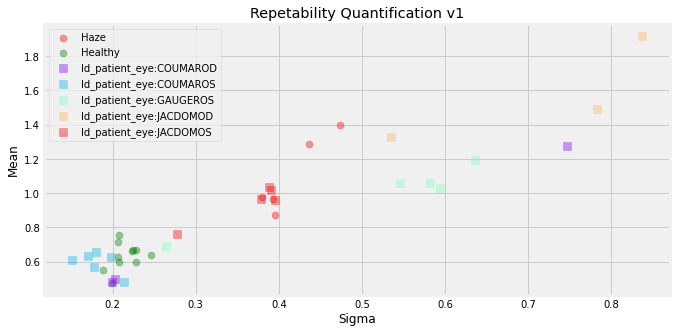

In [27]:
from matplotlib import cm

repertory_healthy=os.path.join(dirname, 'Data','Healthy')
healthy_value=1 #healthy
data_healthy=create_new_dataset(repertory_healthy,healthy_value)

repertory_haze=os.path.join(dirname, 'Data','HAZE')
healthy_value=0 #patho
data_haze=create_new_dataset(repertory_haze,healthy_value)

repertory_fuchs_rep=os.path.join(dirname, 'Data','repetabilite_FuchsDMEK')
healthy_value=2 #fushs
data_fuchs_rep=create_new_dataset(repertory_fuchs_rep,healthy_value)
alpha=0.4

if 'Id_patient_eye' not in data_fuchs_rep.columns:
	origin=data_fuchs_rep["Origin"]
	n=len(origin)
	repetition=[]
	id_patient=[]
	id_patient_eye=[]
	eye=[]
	for i in range(n):
		text=origin[i]
		text=text.split('_')
		repetition.append(int(text[-1]))
		id_patient.append(text[0])
		id_patient_eye.append(text[0]+text[2])
		eye.append(text[2])

	data_fuchs_rep["Repetition"]=repetition
	data_fuchs_rep["Id_patient"]=id_patient
	data_fuchs_rep["Id_patient_eye"]=id_patient_eye
	data_fuchs_rep["Eye"]=eye
 
plt.figure(figsize=(10,5))
colors = cm.rainbow(np.linspace(0, 1, len(np.unique(data_fuchs_rep["Id_patient_eye"]))))
plt.scatter(data_haze["Sigma"],data_haze["Mean"],marker='o',c='r',s=50,label="Haze",alpha=alpha)
plt.scatter(data_healthy["Sigma"],data_healthy["Mean"],marker='o',c='g',s=50,label="Healthy",alpha=alpha)
# ax[0].scatter(data_healthy2_new["X"],data_healthy2_new["Y"],marker='o',s=50,label="Healthy",alpha=alpha)
for i,m in enumerate(np.unique(data_fuchs_rep["Id_patient_eye"])):
	filter=data_fuchs_rep["Id_patient_eye"]==m
	plt.scatter(data_fuchs_rep["Sigma"][filter],data_fuchs_rep["Mean"][filter],marker='s',color=colors[i],s=50,label="Id_patient_eye:"+str(m),alpha=alpha)
	plt.xlabel("Sigma")
	plt.ylabel("Mean")
plt.legend()
plt.title("Repetability Quantification v1")
	# ax[0].set_xlim([np.mean(df["X"])-np.std(df["X"]),np.mean(df["X"])+np.std(df["X"])])
	# ax[0].set_ylim([np.mean(df["Y"])-np.std(df["Y"]),np.mean(df["Y"])+np.std(df["Y"])])

In [28]:

data_copy=data_fuchs_rep.drop(["Healthy","Origin","Eye","Repetition","Id_patient","Id_patient_eye"],axis=1)
data_copy=(data_copy-data_set_mean)/(data_set_std)
X=np.sum(data_copy*pca.components_[0],axis=1)
Y=np.sum(data_copy*pca.components_[1],axis=1)
# Z=np.sum(data_copy*pca.components_[2],axis=1)
new = data_fuchs_rep.filter(["Healthy","Origin","Eye","Id_patient","Repetition","Id_patient_eye"], axis=1)
new['X']=X;new['Y']=Y #;new['Z']=Z
data_fuchs_rep_new=new

data_copy=data_healthy.drop(["Healthy","Origin"],axis=1)
data_copy=(data_copy-data_set_mean)/(data_set_std)
X=np.sum(data_copy*pca.components_[0],axis=1)
Y=np.sum(data_copy*pca.components_[1],axis=1)
# Z=np.sum(data_copy*pca.components_[2],axis=1)
new = data_healthy.filter(["Healthy","Origin"], axis=1)
new['X']=X;new['Y']=Y#;new['Z']=Z
data_healthy_new=new

data_copy=data_haze.drop(["Healthy","Origin"],axis=1)
data_copy=(data_copy-data_set_mean)/(data_set_std)
X=np.sum(data_copy*pca.components_[0],axis=1)
Y=np.sum(data_copy*pca.components_[1],axis=1)
# Z=np.sum(data_copy*pca.components_[2],axis=1)
new = data_haze.filter(["Healthy","Origin"], axis=1)
new['X']=X;new['Y']=Y#;new['Z']=Z
data_haze_new=new


Text(0.5, 1.0, 'Repetability Q1')

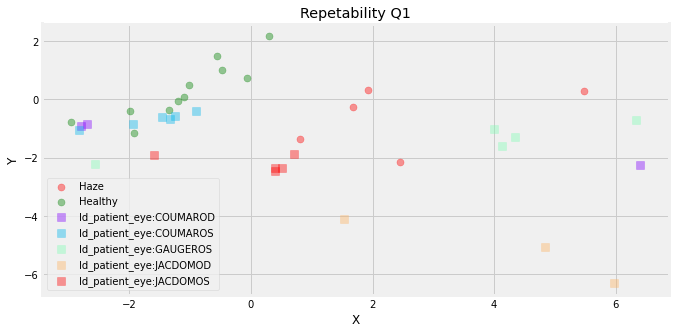

In [29]:
plt.figure(figsize=(10,5))
colors = cm.rainbow(np.linspace(0, 1, len(np.unique(data_fuchs_rep_new["Id_patient_eye"]))))
plt.scatter(data_haze_new["X"],data_haze_new["Y"],marker='o',c='r',s=50,label="Haze",alpha=alpha)
plt.scatter(data_healthy_new["X"],data_healthy_new["Y"],marker='o',c='g',s=50,label="Healthy",alpha=alpha)
# ax[0].scatter(data_healthy2_new["X"],data_healthy2_new["Y"],marker='o',s=50,label="Healthy",alpha=alpha)
for i,m in enumerate(np.unique(data_fuchs_rep_new["Id_patient_eye"])):
	filter=data_fuchs_rep_new["Id_patient_eye"]==m
	plt.scatter(data_fuchs_rep_new["X"][filter],data_fuchs_rep_new["Y"][filter],marker='s',color=colors[i],s=50,label="Id_patient_eye:"+str(m),alpha=alpha)
	plt.xlabel("X")
	plt.ylabel("Y")
	# ax[0].set_xlim([np.mean(df["X"])-np.std(df["X"]),np.mean(df["X"])+np.std(df["X"])])
	# ax[0].set_ylim([np.mean(df["Y"])-np.std(df["Y"]),np.mean(df["Y"])+np.std(df["Y"])])
plt.legend()
plt.title("Repetability Q1")

In [30]:
print("Q1:")
for i,m in enumerate(np.unique(data_fuchs_rep_new["Id_patient_eye"])):
	filter=data_fuchs_rep_new["Id_patient_eye"]==m
	X=data_fuchs_rep_new["X"][filter]
	Y=data_fuchs_rep_new["Y"][filter]
	print(m+":\n	Xmean={:.2f}, Ymean={:.2f}\n	Xsigma={:.2f}, Ysigma={:.2f}".format(np.mean(X),np.mean(Y),np.std(X),np.std(Y)))
	# ax[0].set_xlim([np.mean(df["X"])-np.std(df["X"]),np.mean(df["X"])+np.std(df["X"])])
	# ax[0].set_ylim([np.mean(df["Y"])-np.std(df["Y"]),np.mean(df["Y"])+np.std(df["Y"])])

Q1:
COUMAROD:
	Xmean=0.30, Ymean=-1.35
	Xsigma=4.31, Ysigma=0.65
COUMAROS:
	Xmean=-1.62, Ymean=-0.70
	Xsigma=0.62, Ysigma=0.21
GAUGEROS:
	Xmean=3.25, Ymean=-1.37
	Xsigma=3.03, Ysigma=0.52
JACDOMOD:
	Xmean=4.12, Ymean=-5.15
	Xsigma=1.89, Ysigma=0.90
JACDOMOS:
	Xmean=0.09, Ymean=-2.19
	Xsigma=0.85, Ysigma=0.24


In [31]:
data_healthy

,PeakWidth,Sigma,DataCov,Mean,MSE,AreaRatio,Healthy,Origin
0,1.384722,0.246538,0.002342,0.639839,0.018596,0.014643,1,23923_BOULIS_OD
1,1.384722,0.188283,0.003954,0.549495,0.051042,0.022550,1,79296_BESNIC_OD
2,1.384722,0.207991,0.004476,0.755853,0.073775,0.022506,1,80552_CORANT_OD
3,1.384722,0.224115,0.004386,0.668451,0.029632,0.019277,1,80552_CORANT_OS
4,1.384722,0.227556,0.003016,0.595273,0.034183,0.020157,1,80553_DUMFAU_OD
5,1.384722,0.207308,0.003744,0.599387,0.027732,0.012250,1,80553_DUMFAU_OS
6,0.923148,0.199320,0.001656,0.475522,0.017175,0.015893,1,80608_REZAZK_OD
7,1.384722,0.228444,0.009355,0.667246,0.042761,0.028325,1,81225_GOLDIM_OD
8,1.384722,0.223902,0.007626,0.662958,0.067902,0.012634,1,81225_GOLDIM_OS
9,1.384722,0.206968,0.003924,0.626403,0.034294,0.022415,1,81232_VILMAE_OD


In [32]:
variable
k

6

0
PeakWidth
1
Sigma
2
DataCov
3
Mean
4
MSE
5
AreaRatio


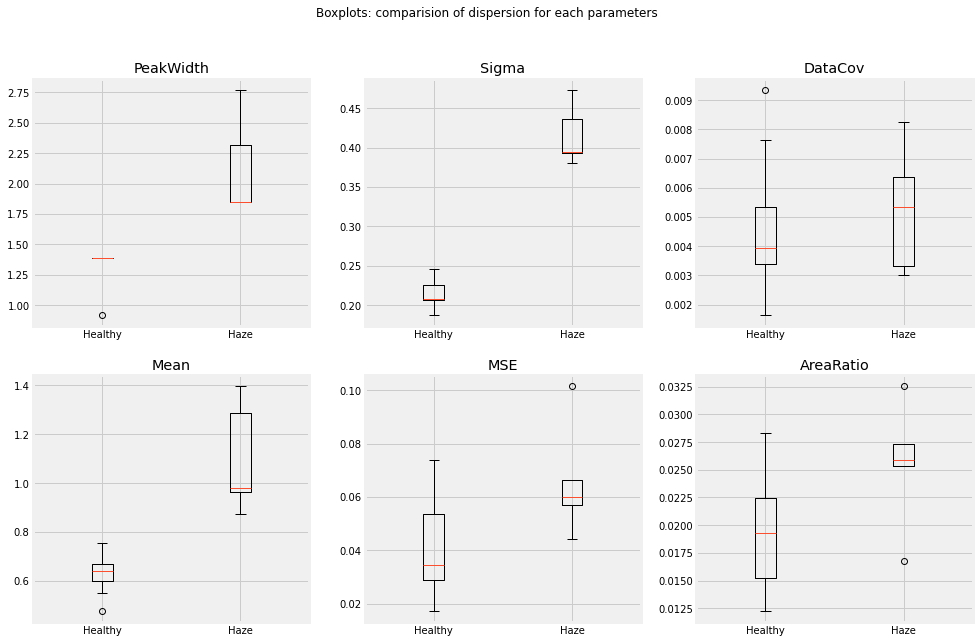

In [33]:
variable=data_healthy.columns[:-2]
k=len(variable)

column=int(np.sqrt(k))
line=int(k/column)
temp=line
line=column
column=temp
fig,ax=plt.subplots(line,column,figsize=(15,10))
fig.suptitle('Boxplots: comparision of dispersion for each parameters', fontsize=12)
for i in range(line):
	for j in range(column):
		p=i*column+j
		print(p)
		if p<k:
			var_name=variable[p]
			print(var_name)
			ax[i][j].boxplot([data_healthy[var_name],data_haze[var_name]])
			ax[i][j].set_xticklabels(["Healthy","Haze"])
			ax[i][j].set_title(var_name)
		

In [34]:
	data_healthy.to_pickle("./Dataset/data_set_Q1_healthy"+".pkl")
	# data_healthy_2.to_pickle("./Dataset/data_set_Q1_healthy_2"+".pkl")
	data_haze.to_pickle("./Dataset/data_set_Q1_haze"+".pkl")
	# data_haze_2.to_pickle("./Dataset/data_set_Q1_haze_2"+".pkl")
	data_fuchs.to_pickle("./Dataset/data_set_Q1_fuchs"+".pkl")
	data_fuchs_rep.to_pickle("./Dataset/data_set_Q1_fuchs_rep"+".pkl")

In [50]:
data_healthy_2.head()

,PeakWidth,Sigma,DataCov,Mean,MSE,AreaRatio,Healthy,Origin
0,0.923148,0.192022,0.010441,0.494268,0.042019,0.023615,1,ARAILI_OS_Line
1,1.384722,0.207173,0.007088,0.616592,0.071651,0.020323,1,BEGABD_OD_Cross
2,1.384722,0.178616,0.008137,0.662692,0.080370,0.019066,1,BEGABD_OD_Pachy
3,1.384722,0.190988,0.007933,0.628456,0.088622,0.020435,1,BEGABD_OS_Cross
4,1.384722,0.173152,0.007359,0.573725,0.148950,0.017489,1,BEGABD_OS_Pachy


In [51]:
repertory_haze_2=os.path.join(dirname, 'Data','HAZE_2')
healthy_value=0 #fushs
data_haze_2=create_new_dataset(repertory_haze_2,healthy_value)

if 'Month' not in data_haze_2.columns:
	origin=data_haze_2["Origin"]
	n=len(origin)
	month=[]
	id_patient=[]
	eye=[]
	for i in range(n):
		text=origin[i]
		text=text.split('_')
		if text[-2]=="normal":
			month.append(0)
		else:
			month.append(int(text[-2][1:]))
		id_patient.append(text[0])
		eye.append(text[1])

	data_haze_2["Month"]=month
	data_haze_2["Id_patient"]=id_patient
	data_haze_2["Eye"]=eye

data_copy=data_haze_2.drop(["Healthy","Origin","Month","Eye","Id_patient"],axis=1)
data_copy=(data_copy-data_set_mean)/(data_set_std)
X=np.sum(data_copy*pca.components_[0],axis=1)
Y=np.sum(data_copy*pca.components_[1],axis=1)
# Z=np.sum(data_copy*pca.components_[2],axis=1)
new = data_haze_2.filter(["Healthy","Origin","Eye","Id_patient","Month"], axis=1)
new['X']=X;new['Y']=Y#;new['Z']=Z
data_haze2_new=new


repertory_healthy_2=os.path.join(dirname, 'Data','Healthy_2')
healthy_value=1 #fushs
data_healthy_2=create_new_dataset(repertory_healthy_2,healthy_value)

data_copy=data_healthy_2.drop(["Healthy","Origin"],axis=1)
data_copy=(data_copy-data_set_mean)/(data_set_std)
X=np.sum(data_copy*pca.components_[0],axis=1)
Y=np.sum(data_copy*pca.components_[1],axis=1)
# Z=np.sum(data_copy*pca.components_[2],axis=1)
new = data_healthy_2.filter(["Healthy","Origin"], axis=1)
new['X']=X;new['Y']=Y#;new['Z']=Z
data_healthy2_new=new

Error with: AUBOLI_OD_Line_PKR_M01_1.jpg image #2
Error with: AUBOLI_OD_Line_PKR_M18_1.jpg image #4
Error with: AUBOLI_OS_Line_normal_1.jpg image #5
Error with: AUBOLI_OS_Line_normal_2.jpg image #6
Error with: BOUEMI_OD_Line_normal_2.jpg image #8
Error with: BOUEMI_OS_Line_PKR_M06_1.jpg image #11
24 / 30  files succesfully quantified
Error with: ARAILI_OS_Pachy.jpg image #2
Error with: CORDIA_OD_PachyWide.jpg image #24
Error with: DENCAM_OS_PachyWide.jpg image #30
Error with: DRONIC_OD_Cross.jpg image #35
Error with: DUFLAU_OD_PachyWide.jpg image #40
Error with: ESTNAN_OD_Line.jpg image #47
Error with: FAVJUL_OD_Line.jpg image #51
Error with: FAVJUL_OS_Pachy.jpg image #54
Error with: GAYSTE_OD_Line.jpg image #55
Error with: GAYSTE_OS_PachyWide.jpg image #58
Error with: GIRCHA_OD_Cross.jpg image #59
Error with: GRESUZ_OS_Line.jpg image #67
Error with: GRESUZ_OS_Pachy.jpg image #68
Error with: LELCLA_OS_Pachy.jpg image #94
Error with: MAGKOR_OD_PachyWide.jpg image #108
Error with: MARPHI

In [63]:
data_copy=data_fuchs.drop(["Healthy","Origin","Month"],axis=1)
data_copy=(data_copy-data_set_mean)/(data_set_std)
X=np.sum(data_copy*pca.components_[0],axis=1)
Y=np.sum(data_copy*pca.components_[1],axis=1)
# Z=np.sum(data_copy*pca.components_[2],axis=1)
new = data_fuchs.filter(["Healthy","Origin","Month"], axis=1)
new['X']=X;new['Y']=Y#;new['Z']=Z
data_fuchs_new=new

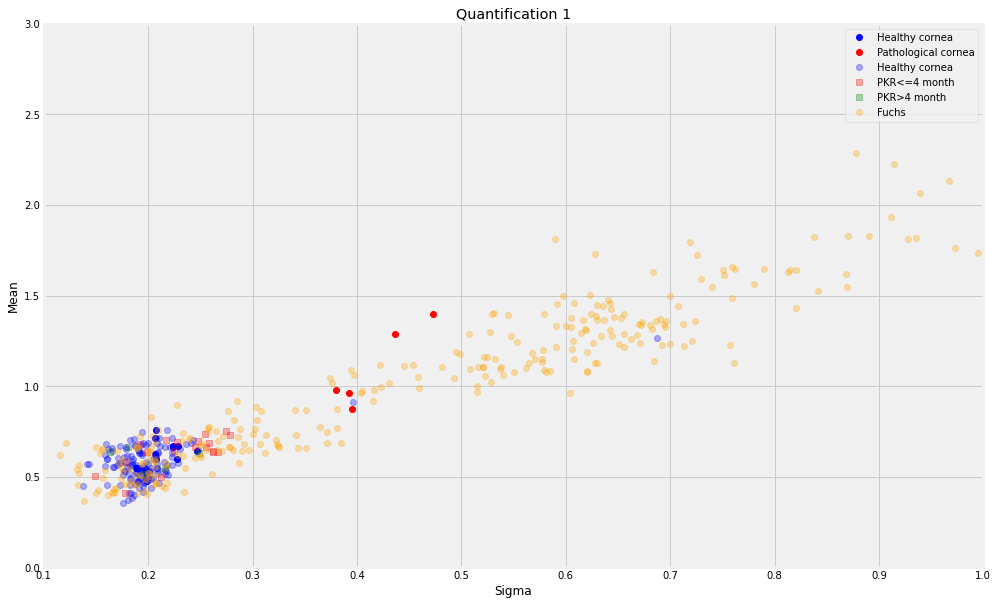

In [67]:
plt.figure(figsize=(15,10))


plt.plot(data_healthy['Sigma'],data_healthy['Mean'],'o',color="blue",alpha=1,label="Healthy cornea")
plt.plot(data_haze['Sigma'],data_haze['Mean'],'o',color="red",alpha=1,label="Pathological cornea")

plt.plot(data_healthy_2['Sigma'],data_healthy_2['Mean'],'o',color="blue",alpha=0.3,label="Healthy cornea")

tho=4
bool_month=data_haze_2['Month']<=tho
plt.plot(data_haze_2['Sigma'][bool_month],data_haze_2['Mean'][bool_month],'s',color="red",alpha=0.3,label="PKR<={:.0f} month".format(tho))
bool_month=data_haze_2['Month']>tho
plt.plot(data_haze_2['Sigma'][bool_month],data_haze_2['Mean'][bool_month],'s',color="green",alpha=0.3,label="PKR>{:.0f} month".format(tho))

plt.plot(data_fuchs['Sigma'],data_fuchs['Mean'],'o',color="orange",alpha=0.3,label="Fuchs")
plt.ylim([0,3])
plt.xlim([0.1,1])
plt.xlabel("Sigma")
plt.ylabel("Mean")
plt.title("Quantification 1")
plt.legend()
plt.show()

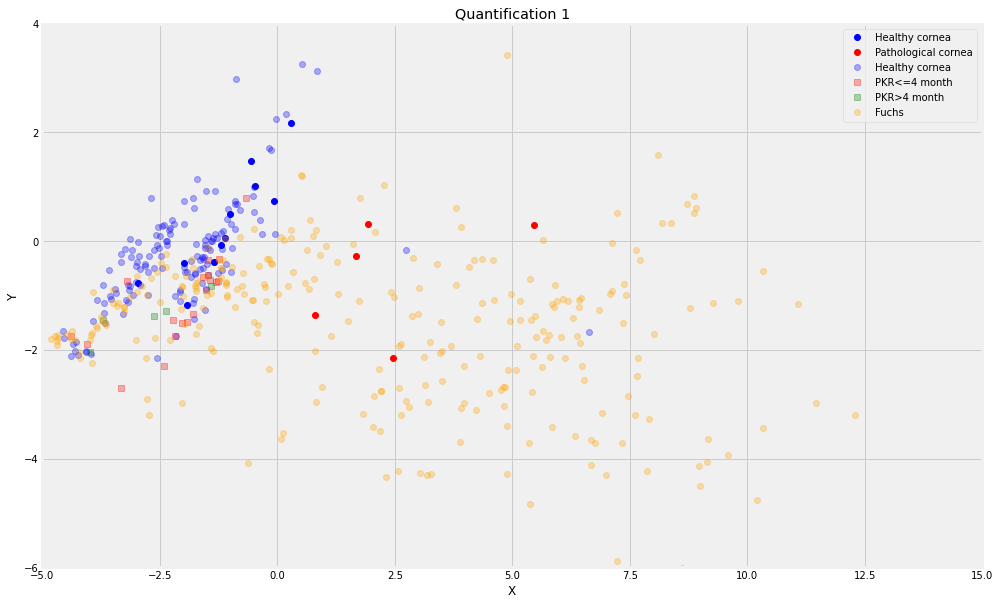

In [66]:
plt.figure(figsize=(15,10))


plt.plot(data_healthy_new['X'],data_healthy_new['Y'],'o',color="blue",alpha=1,label="Healthy cornea")
plt.plot(data_haze_new['X'],data_haze_new['Y'],'o',color="red",alpha=1,label="Pathological cornea")

plt.plot(data_healthy2_new['X'],data_healthy2_new['Y'],'o',color="blue",alpha=0.3,label="Healthy cornea")

tho=4
bool_month=data_haze_2['Month']<=tho
plt.plot(data_haze2_new['X'][bool_month],data_haze2_new['Y'][bool_month],'s',color="red",alpha=0.3,label="PKR<={:.0f} month".format(tho))
bool_month=data_haze_2['Month']>tho
plt.plot(data_haze2_new['X'][bool_month],data_haze2_new['Y'][bool_month],'s',color="green",alpha=0.3,label="PKR>{:.0f} month".format(tho))

plt.plot(data_fuchs_new['X'],data_fuchs_new['Y'],'o',color="orange",alpha=0.3,label="Fuchs")

plt.ylim([-6,4])
plt.xlim([-5,15])
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Quantification 1")
plt.legend()
plt.show()